In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sqlite3

In [3]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

// make sure new CodeMirror instance also use this setting
CodeMirror.defaults.cursorBlinkRate=rate;

<IPython.core.display.Javascript object>

In [45]:
df = pd.read_csv("datasets/2009.csv")
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.drop("Unnamed: 27", axis = 1)

## Feature selection
#### Correlation matrix
In case of a big dataset like this one, it would be to computationaly expensive to perform Recursive Feature Selection, therefore we use the correlation matrix method.

In [6]:
corr = df.corr()

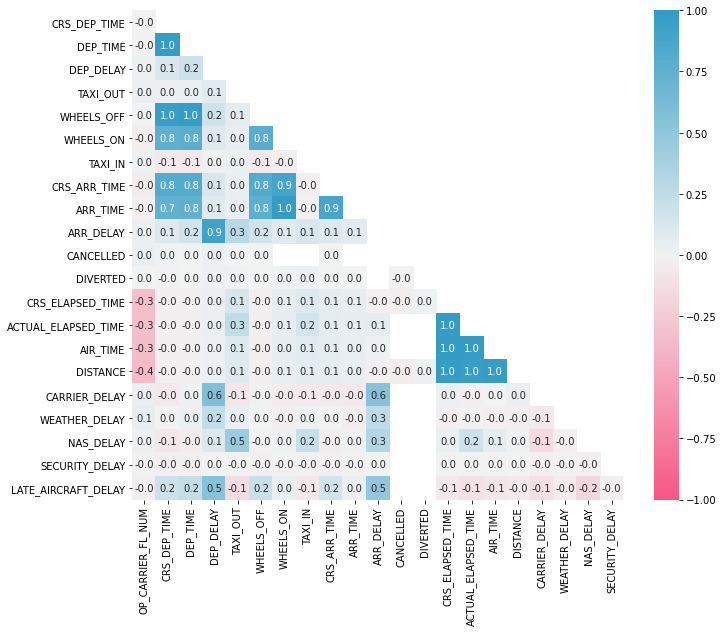

In [19]:
fig, ax = plt.subplots(figsize = (11, 9))

cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr2 = corr.iloc[1:, :-1].copy()

sb.heatmap(corr2, mask = mask, vmin = -1, vmax = 1, cmap = cmap, annot = True, fmt = ".1f")

plt.show()